# WATER QUALITY

## Context
Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

Reference : https://www.kaggle.com/adityakadiwal/water-potability

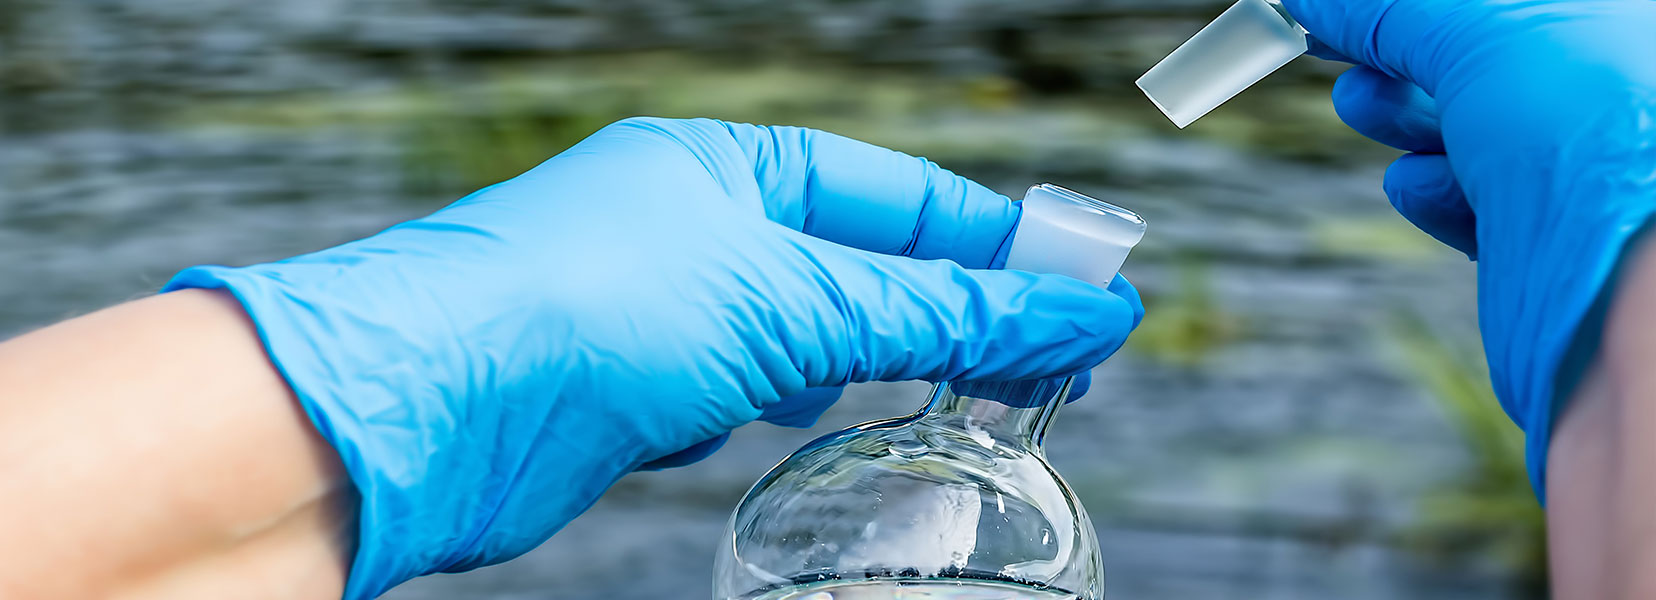

## LIBRARIES

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew
from scipy.stats import shapiro

warnings.filterwarnings("ignore")

# Basic Libraries
import numpy as np
import pandas as pd
from warnings import filterwarnings
from collections import Counter

# Visualizations Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objs as go

pyo.init_notebook_mode()
import plotly.figure_factory as ff
import missingno as msno

# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Modelling Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation & CV Libraries
from sklearn.metrics import precision_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, RepeatedStratifiedKFold

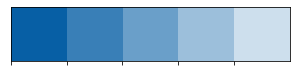

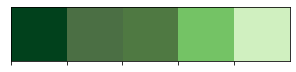

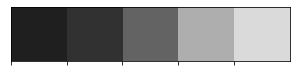

In [2]:
#Color Palette

colors_blue = ['#075fa5', '#397fb7', '#6a9fc9', '#9cbfdb', '#cddfed']
colors_green = ['#01411C', '#4B6F44', '#4F7942', '#74C365', '#D0F0C0']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
sns.palplot(colors_blue)
sns.palplot(colors_green)
sns.palplot(colors_dark)

## LOAD & CHECK DATA

In [3]:
df = pd.read_csv('water_potability.csv')
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df.describe().T

count          mean          std         min           25%  \
ph               2785.0      7.080795     1.594320    0.000000      6.093092   
Hardness         3276.0    196.369496    32.879761   47.432000    176.850538   
Solids           3276.0  22014.092526  8768.570828  320.942611  15666.690297   
Chloramines      3276.0      7.122277     1.583085    0.352000      6.127421   
Sulfate          2495.0    333.775777    41.416840  129.000000    307.699498   
Conductivity     3276.0    426.205111    80.824064  181.483754    365.734414   
Organic_carbon   3276.0     14.284970     3.308162    2.200000     12.065801   
Trihalomethanes  3114.0     66.396293    16.175008    0.738000     55.844536   
Turbidity        3276.0      3.966786     0.780382    1.450000      3.439711   
Potability       3276.0      0.390110     0.487849    0.000000      0.000000   

                          50%           75%           max  
ph                   7.036752      8.062066     14.000000  
Hardness           196.967627    216.667456    323.124000  
Solids           20927.833607  27332.762127  61227.196008  
Chloramines          7.130299      8.114887     13.127000  
Sulfate            333.073546    359.950170    481.030642  
Conductivity       421.884968    481.792304    753.342620  
Organic_carbon      14.218338     16.557652     28.300000  
Trihalomethanes     66.622485     77.337473    124.000000  
Turbidity            3.955028      4.500320      6.739000  
Potability           0.000000      1.000000      1.000000

## TRAIN & TEST

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Potability',
                                                            axis=1),
                                                    df['Potability'],
                                                    test_size=0.2,
                                                    random_state=42)

In [7]:
y_train = pd.DataFrame(y_train, columns=['Potability'])
y_test = pd.DataFrame(y_test, columns=['Potability'])
df_train = pd.concat([X_train, y_train], axis=1)

## TARGET

### FEATURE DESCRIPTION

**Potability:**
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.



Reference : https://www.kaggle.com/adityakadiwal/water-potability

(-0.49, 1.49, 0.0, 63.56106870229007)

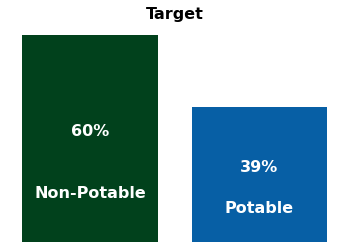

In [8]:
total = y_train['Potability'].count()
potable = y_train['Potability'][y_train['Potability'] ==
                                1].count() * 100 / total
n_potable = y_train['Potability'][y_train['Potability'] ==
                                  0].count() * 100 / total

target = ['Non-Potable', 'Potable']
ax = plt.bar(['Not potable', 'potable'], [n_potable, potable],
             color=[colors_green[0], colors_blue[0]])
for i, value in enumerate(ax):
    height = value.get_height()
    plt.text(value.get_x() + value.get_width() / 2.,
             0.5 * height,
             '%d' % int(height) + "%",
             ha="center",
             va="bottom",
             color="white",
             fontsize=16,
             fontweight="bold")
    plt.text(value.get_x() + value.get_width() / 2.,
             0.2 * height,
             target[i],
             ha="center",
             va="bottom",
             color="white",
             fontsize=16,
             fontweight="bold")

plt.title("Target", fontsize=16, fontweight="bold")
plt.xlabel("Potability", fontsize=16, fontweight="bold")
plt.ylabel("%", fontsize=16, fontweight="bold")
plt.axis('off')

<div class="alert-info"> 
    
* The target values are unbalanced.
    
* Being a both 60% of non-potable data and that 39% of potable data. 
</div>

## FEATURES

### FEATURE DESCRIPTION

1. **pH value:** 
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. **Hardness:** 
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. **Solids (Total dissolved solids - TDS):** 
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. **Chloramines:** 
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. **Sulfate:**
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. **Conductivity:**
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. **Organic_carbon:**
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. **Trihalomethanes:**
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. **Turbidity:**
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

Reference : https://www.kaggle.com/adityakadiwal/water-potability

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2620 entries, 233 to 3174
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2225 non-null   float64
 1   Hardness         2620 non-null   float64
 2   Solids           2620 non-null   float64
 3   Chloramines      2620 non-null   float64
 4   Sulfate          1989 non-null   float64
 5   Conductivity     2620 non-null   float64
 6   Organic_carbon   2620 non-null   float64
 7   Trihalomethanes  2493 non-null   float64
 8   Turbidity        2620 non-null   float64
dtypes: float64(9)
memory usage: 204.7 KB


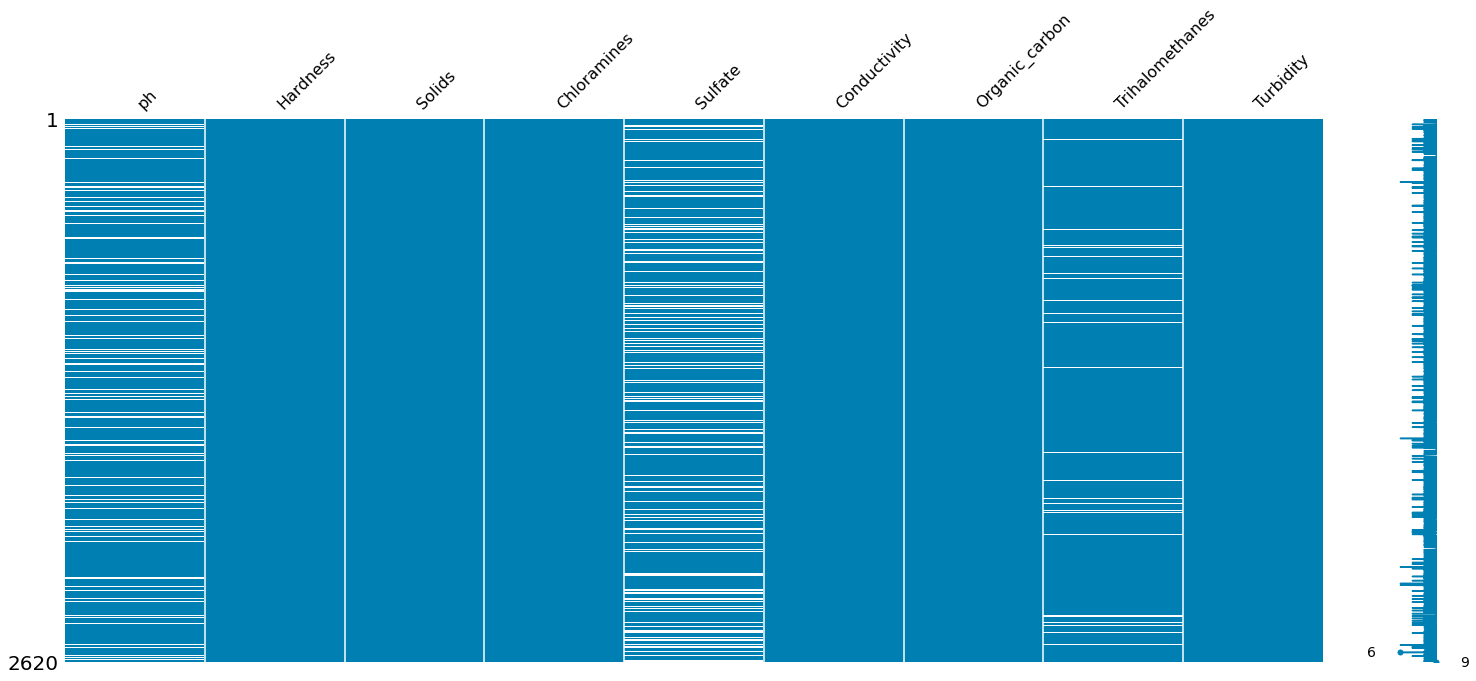

In [10]:
fig = msno.matrix(X_train, color=(0, 0.5, 0.7))

In [11]:
def data_report(df):
    # Names
    cols = pd.DataFrame(df.columns.values, columns=["COL_N"])

    # types
    types = pd.DataFrame(df.dtypes.values, columns=["DATA_TYPE"])

    #  MISSINGS
    percent_missing = round(df.isnull().sum() * 100 / len(df), 2)
    percent_missing_df = pd.DataFrame(percent_missing.values,
                                      columns=["MISSINGS (%)"])

    # unique values
    unicos = pd.DataFrame(df.nunique().values, columns=["UNIQUE_VALUES"])

    percent_cardin = round(unicos['UNIQUE_VALUES'] * 100 / len(df), 2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values,
                                     columns=["CARDIN (%)"])

    concatenado = pd.concat(
        [cols, types, percent_missing_df, unicos, percent_cardin_df],
        axis=1,
        sort=False)
    concatenado.set_index('COL_N', drop=True, inplace=True)

    return concatenado.T


data_report(X_train)

COL_N               ph Hardness   Solids Chloramines  Sulfate Conductivity  \
DATA_TYPE      float64  float64  float64     float64  float64      float64   
MISSINGS (%)     15.08      0.0      0.0         0.0    24.08          0.0   
UNIQUE_VALUES     2225     2620     2620        2620     1989         2620   
CARDIN (%)       84.92    100.0    100.0       100.0    75.92        100.0   

COL_N         Organic_carbon Trihalomethanes Turbidity  
DATA_TYPE            float64         float64   float64  
MISSINGS (%)             0.0            4.85       0.0  
UNIQUE_VALUES           2620            2493      2620  
CARDIN (%)             100.0           95.15     100.0

<div class="alert-info"> 

* All features are numeric.
* The features that have missings are:
    - pH: 15.08 %
    - Sulfate: 24.08%
    - Trihalomethanes : 4.85%
    
<div>

In [12]:
X_train.describe().T

count          mean          std         min           25%  \
ph               2225.0      7.088976     1.587250    0.000000      6.106760   
Hardness         2620.0    196.448911    32.579075   73.492234    176.832962   
Solids           2620.0  22066.597807  8835.078941  728.750830  15736.815715   
Chloramines      2620.0      7.107867     1.588035    0.352000      6.108402   
Sulfate          1989.0    333.653302    41.550603  129.000000    307.987458   
Conductivity     2620.0    426.420949    81.189543  181.483754    365.712099   
Organic_carbon   2620.0     14.251860     3.285042    4.371899     12.054236   
Trihalomethanes  2493.0     66.355132    16.245992    8.175876     55.697400   
Turbidity        2620.0      3.959903     0.779162    1.492207      3.429438   

                          50%           75%           max  
ph                   7.021617      8.058136     14.000000  
Hardness           196.901673    216.690772    323.124000  
Solids           20921.203012  27203.707180  61227.196008  
Chloramines          7.107117      8.097686     13.127000  
Sulfate            332.759029    360.086901    481.030642  
Conductivity       422.033283    481.179357    753.342620  
Organic_carbon      14.155598     16.519916     28.300000  
Trihalomethanes     66.621027     77.373813    124.000000  
Turbidity            3.940678      4.497655      6.739000

<div class="alert-info"> 

* The difference between the mean and the median is very small in all the features
    
<div>




### Hardness

In [13]:
fig = px.histogram(df_train,
                   x='Hardness',
                   y=Counter(df_train['Hardness']),
                   color='Potability',
                   template='plotly_white',
                   marginal='box',
                   opacity=0.7,
                   nbins=100,
                   color_discrete_sequence=[colors_green[0], colors_blue[0]],
                   barmode='group',
                   histfunc='count')

fig.add_vline(x=151,
              line_width=1,
              line_color=colors_dark[1],
              line_dash='dot',
              opacity=0.7)
fig.add_vline(x=301,
              line_width=1,
              line_color=colors_dark[1],
              line_dash='dot',
              opacity=0.7)
fig.add_vline(x=76,
              line_width=1,
              line_color=colors_dark[1],
              line_dash='dot',
              opacity=0.7)

fig.add_annotation(text='<76 mg/L is<br> considered soft',
                   x=40,
                   y=130,
                   showarrow=False,
                   font_size=9)
fig.add_annotation(text='Between 76 and 150<br> (mg/L) is<br>moderately hard',
                   x=113,
                   y=130,
                   showarrow=False,
                   font_size=9)
fig.add_annotation(text='Between 151 and 300 (mg/L)<br> is considered hard',
                   x=250,
                   y=130,
                   showarrow=False,
                   font_size=9)
fig.add_annotation(text='>300 mg/L is<br> considered very hard',
                   x=340,
                   y=130,
                   showarrow=False,
                   font_size=9)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Hardness Distribution',
               x=0.53,
               y=0.95,
               font=dict(color=colors_dark[2], size=20)),
    xaxis_title_text='Hardness (mg/L)',
    yaxis_title_text='Count',
    legend=dict(x=1,
                y=0.96,
                bordercolor=colors_dark[4],
                borderwidth=0,
                tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [14]:
fig.write_html("file.html")

### ph

In [15]:
fig = px.histogram(df_train,
                   x='ph',
                   y=Counter(df_train['ph']),
                   color='Potability',
                   template='plotly_white',
                   marginal='box',
                   opacity=0.7,
                   nbins=100,
                   color_discrete_sequence=[colors_green[0], colors_blue[0]],
                   barmode='group',
                   histfunc='count')

fig.add_vline(x=7,
              line_width=1,
              line_color=colors_dark[1],
              line_dash='dot',
              opacity=0.7)

fig.add_annotation(text='<7 is Acidic',
                   x=4,
                   y=70,
                   showarrow=False,
                   font_size=10)
fig.add_annotation(text='>7 is Basic',
                   x=10,
                   y=70,
                   showarrow=False,
                   font_size=10)

fig.update_layout(
    font_family='monospace',
    title=dict(text='pH Level Distribution',
               x=0.5,
               y=0.95,
               font=dict(color=colors_dark[2], size=20)),
    xaxis_title_text='pH Level',
    yaxis_title_text='Count',
    legend=dict(x=1,
                y=0.96,
                bordercolor=colors_dark[4],
                borderwidth=0,
                tracegroupgap=5),
    bargap=0.3,
)
fig.show()

### Turbidity

In [16]:
fig = px.histogram(df_train,
                   x='Turbidity',
                   y=Counter(df_train['Turbidity']),
                   color='Potability',
                   template='plotly_white',
                   marginal='box',
                   opacity=0.7,
                   nbins=100,
                   color_discrete_sequence=[colors_green[0], colors_blue[0]],
                   barmode='group',
                   histfunc='count')

fig.add_vline(x=5,
              line_width=1,
              line_color=colors_dark[1],
              line_dash='dot',
              opacity=0.7)

fig.add_annotation(text='<5 NTU Turbidity is<br> considered safe',
                   x=6,
                   y=90,
                   showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Turbidity Distribution',
               x=0.5,
               y=0.95,
               font=dict(color=colors_dark[2], size=20)),
    xaxis_title_text='Turbidity (NTU)',
    yaxis_title_text='Count',
    legend=dict(x=1,
                y=0.96,
                bordercolor=colors_dark[4],
                borderwidth=0,
                tracegroupgap=5),
    bargap=0.3,
)
fig.show()

### Solids

In [17]:
fig = px.histogram(df,
                   x='Solids',
                   y=Counter(df['Solids']),
                   color='Potability',
                   template='plotly_white',
                   marginal='box',
                   opacity=0.7,
                   nbins=100,
                   color_discrete_sequence=[colors_green[0], colors_blue[0]],
                   barmode='group',
                   histfunc='count')

fig.update_layout(
    font_family='monospace',
    title=dict(text='Distribution Of Total Dissolved Solids',
               x=0.5,
               y=0.95,
               font=dict(color=colors_dark[2], size=20)),
    xaxis_title_text='Dissolved Solids (ppm)',
    yaxis_title_text='Count',
    legend=dict(x=1,
                y=0.96,
                bordercolor=colors_dark[4],
                borderwidth=0,
                tracegroupgap=5),
    bargap=0.3,
)
fig.show()

### chloramines

In [18]:
fig = px.histogram(df_train,
                   x='Chloramines',
                   y=Counter(df_train['Chloramines']),
                   color='Potability',
                   template='plotly_white',
                   marginal='box',
                   opacity=0.7,
                   nbins=100,
                   color_discrete_sequence=[colors_green[0], colors_blue[0]],
                   barmode='group',
                   histfunc='count')

fig.add_vline(x=4,
              line_width=1,
              line_color=colors_dark[1],
              line_dash='dot',
              opacity=0.7)

fig.add_annotation(text='<4 ppm is considered<br> safe for drinking',
                   x=1.8,
                   y=90,
                   showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Chloramines Distribution',
               x=0.53,
               y=0.95,
               font=dict(color=colors_dark[2], size=20)),
    xaxis_title_text='Chloramines (ppm)',
    yaxis_title_text='Count',
    legend=dict(x=1,
                y=0.96,
                bordercolor=colors_dark[4],
                borderwidth=0,
                tracegroupgap=5),
    bargap=0.3,
)
fig.show()

### Sulfate

In [19]:
fig = px.histogram(df_train,
                   x='Sulfate',
                   y=Counter(df_train['Sulfate']),
                   color='Potability',
                   template='plotly_white',
                   marginal='box',
                   opacity=0.7,
                   nbins=100,
                   color_discrete_sequence=[colors_green[0], colors_blue[0]],
                   barmode='group',
                   histfunc='count')

fig.add_vline(x=250,
              line_width=1,
              line_color=colors_dark[1],
              line_dash='dot',
              opacity=0.7)

fig.add_annotation(text='<250 mg/L is considered<br> safe for drinking',
                   x=175,
                   y=90,
                   showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Sulfate Distribution',
               x=0.53,
               y=0.95,
               font=dict(color=colors_dark[2], size=20)),
    xaxis_title_text='Sulfate (mg/L)',
    yaxis_title_text='Count',
    legend=dict(x=1,
                y=0.96,
                bordercolor=colors_dark[4],
                borderwidth=0,
                tracegroupgap=5),
    bargap=0.3,
)
fig.show()

### Conductivity

In [20]:
fig = px.histogram(df_train,
                   x='Conductivity',
                   y=Counter(df_train['Conductivity']),
                   color='Potability',
                   template='plotly_white',
                   marginal='box',
                   opacity=0.7,
                   nbins=100,
                   color_discrete_sequence=[colors_green[0], colors_blue[0]],
                   barmode='group',
                   histfunc='count')

fig.add_annotation(
    text=
    'The Conductivity range <br> is safe for both (200-800),<br> Potable and Non-Potable water',
    x=600,
    y=90,
    showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Conductivity Distribution',
               x=0.5,
               y=0.95,
               font=dict(color=colors_dark[2], size=20)),
    xaxis_title_text='Conductivity (μS/cm)',
    yaxis_title_text='Count',
    legend=dict(x=1,
                y=0.96,
                bordercolor=colors_dark[4],
                borderwidth=0,
                tracegroupgap=5),
    bargap=0.3,
)
fig.show()

### Organic_carbon

In [21]:
fig = px.histogram(df_train,
                   x='Organic_carbon',
                   y=Counter(df_train['Organic_carbon']),
                   color='Potability',
                   template='plotly_white',
                   marginal='box',
                   opacity=0.7,
                   nbins=100,
                   color_discrete_sequence=[colors_green[0], colors_blue[0]],
                   barmode='group',
                   histfunc='count')

fig.add_vline(x=10,
              line_width=1,
              line_color=colors_dark[1],
              line_dash='dot',
              opacity=0.7)

fig.add_annotation(text='Typical Organic Carbon<br> level is upto 10 ppm',
                   x=5.3,
                   y=110,
                   showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Organic Carbon Distribution',
               x=0.5,
               y=0.95,
               font=dict(color=colors_dark[2], size=20)),
    xaxis_title_text='Organic Carbon (ppm)',
    yaxis_title_text='Count',
    legend=dict(x=1,
                y=0.96,
                bordercolor=colors_dark[4],
                borderwidth=0,
                tracegroupgap=5),
    bargap=0.3,
)
fig.show()

### Trihalomethanes

In [22]:
fig = px.histogram(df_train,
                   x='Trihalomethanes',
                   y=Counter(df_train['Trihalomethanes']),
                   color='Potability',
                   template='plotly_white',
                   marginal='box',
                   opacity=0.7,
                   nbins=100,
                   color_discrete_sequence=[colors_green[0], colors_blue[0]],
                   barmode='group',
                   histfunc='count')

fig.add_vline(x=80,
              line_width=1,
              line_color=colors_dark[1],
              line_dash='dot',
              opacity=0.7)

fig.add_annotation(text='Upper limit of Trihalomethanes<br> level is 80 μg/L',
                   x=115,
                   y=90,
                   showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Trihalomethanes Distribution',
               x=0.5,
               y=0.95,
               font=dict(color=colors_dark[2], size=20)),
    xaxis_title_text='Trihalomethanes (μg/L)',
    yaxis_title_text='Count',
    legend=dict(x=1,
                y=0.96,
                bordercolor=colors_dark[4],
                borderwidth=0,
                tracegroupgap=5),
    bargap=0.3,
)
fig.show()

Asymmetry ph :  nan
Asymmetry Hardness :  -0.02198254935365706
Asymmetry Solids :  0.668327288394969
Asymmetry Chloramines :  -0.014547184436119456
Asymmetry Sulfate :  nan
Asymmetry Conductivity :  0.2796713003365575
Asymmetry Organic_carbon :  0.03818928103474208
Asymmetry Trihalomethanes :  nan
Asymmetry Turbidity :  0.00532030960678153


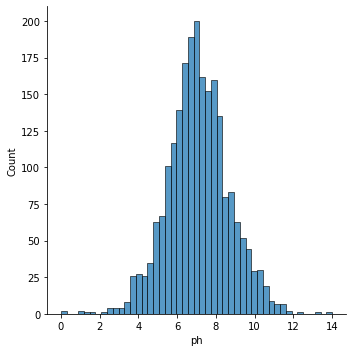

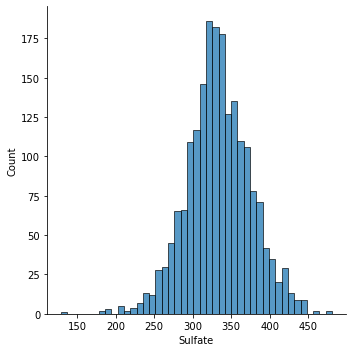

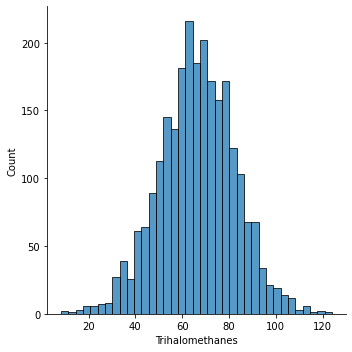

In [23]:
for i in X_train.columns:
    print('Asymmetry', i, ': ', skew(X_train[i]))
    a = skew(X_train[i])

    if np.isnan(a):
        sns.displot(X_train[i])

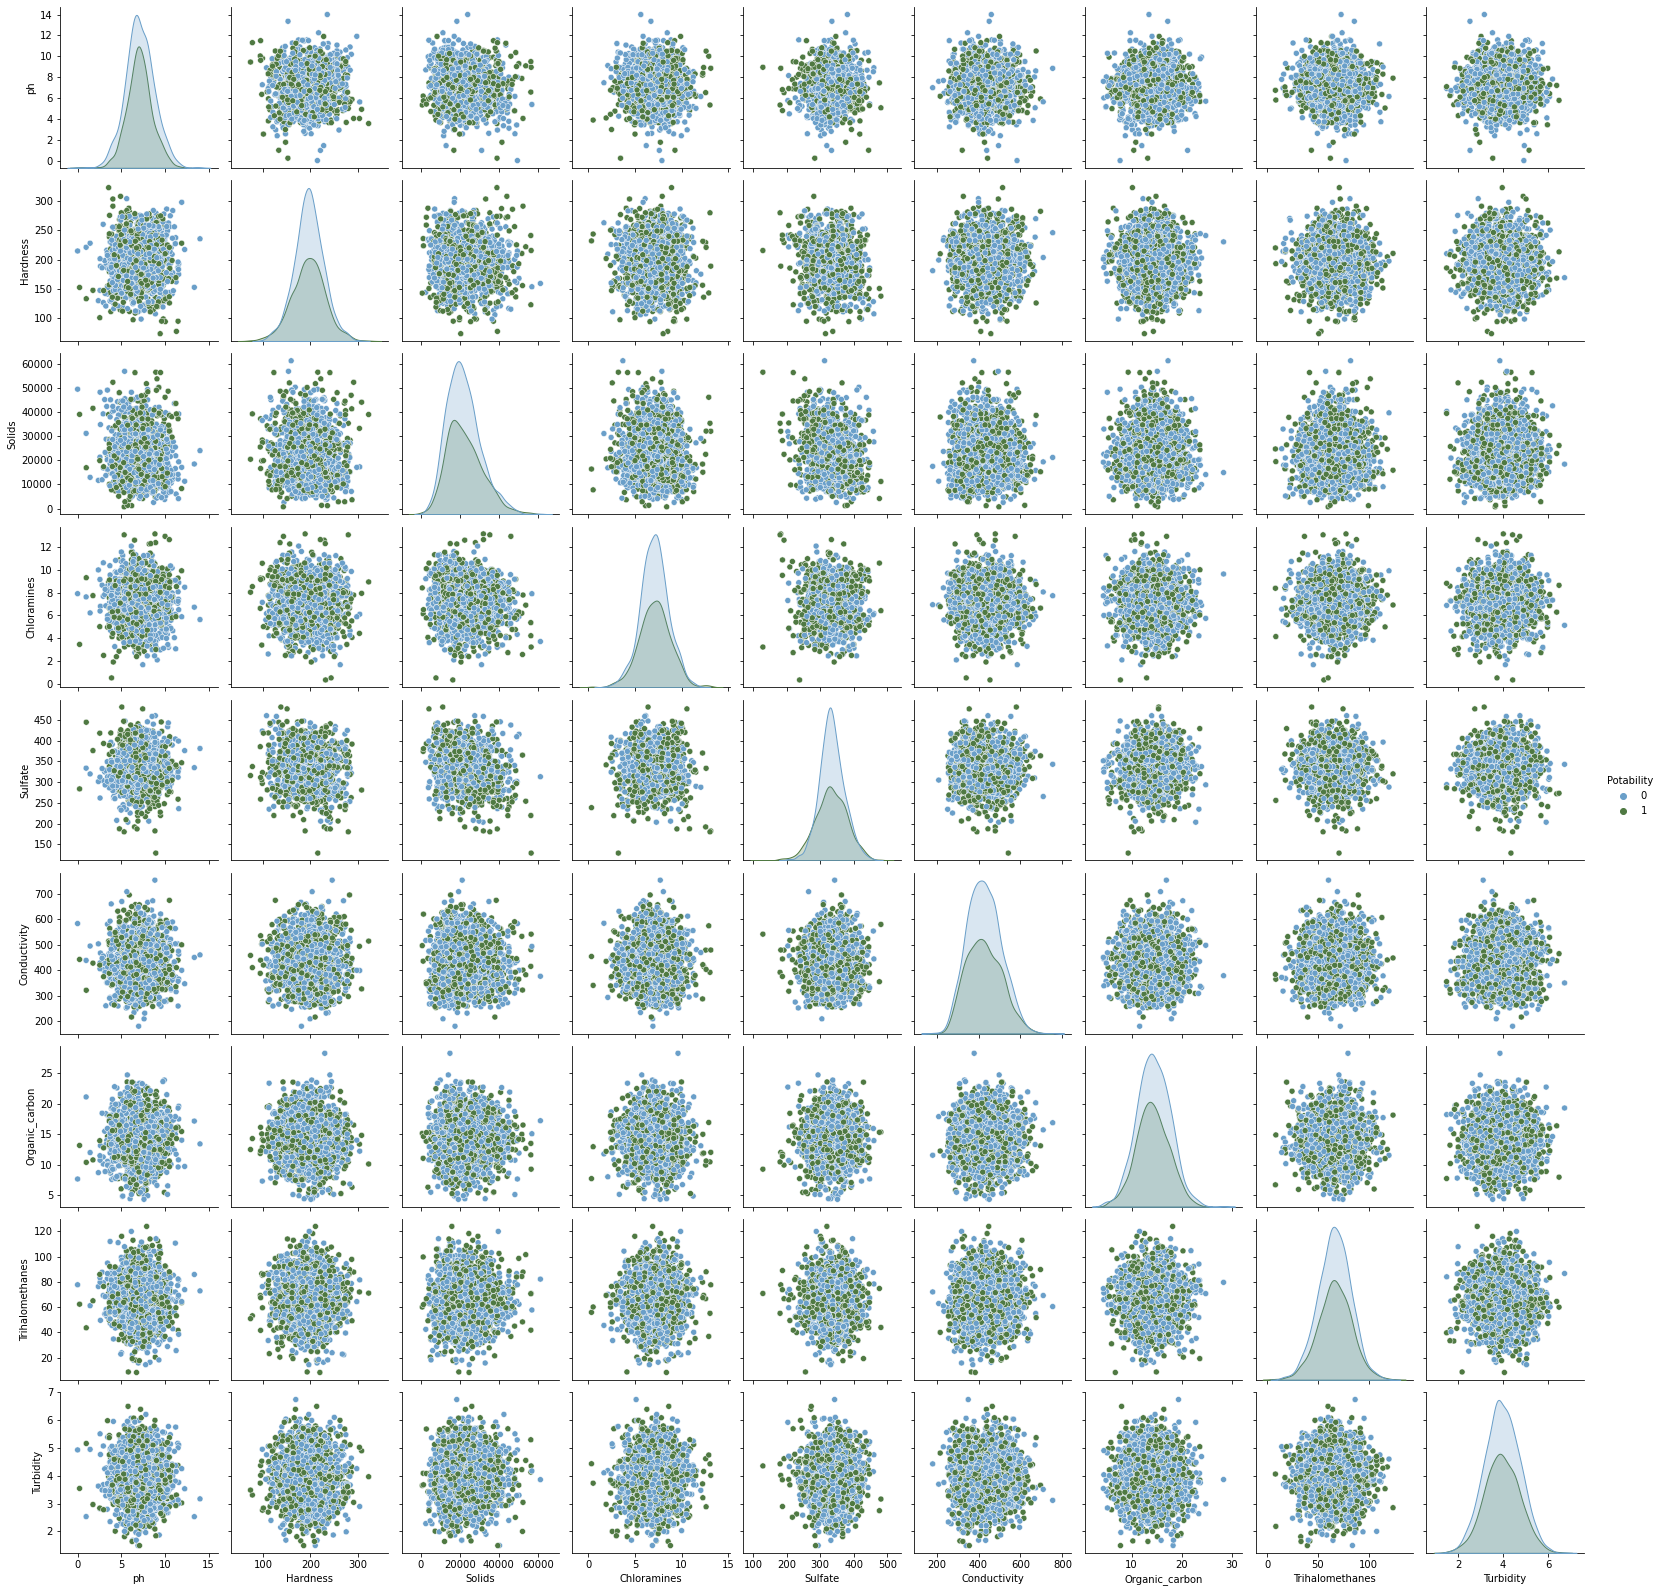

In [24]:
sns.pairplot(df_train,
             kind='scatter',
             hue='Potability',
             palette=[colors_blue[2], colors_green[2]])

<div class="alert-info"> 

* There is no linear correlation between the features.
    
<div>

## FEATURE ENGINEERING

### FEATURES

#### MISSINGS

In [25]:
mean_feature = {}

for i in X_train.columns:
    X_train[i] = X_train[i].fillna(X_train[i].mean())
    mean_feature[i] = X_train[i].mean()

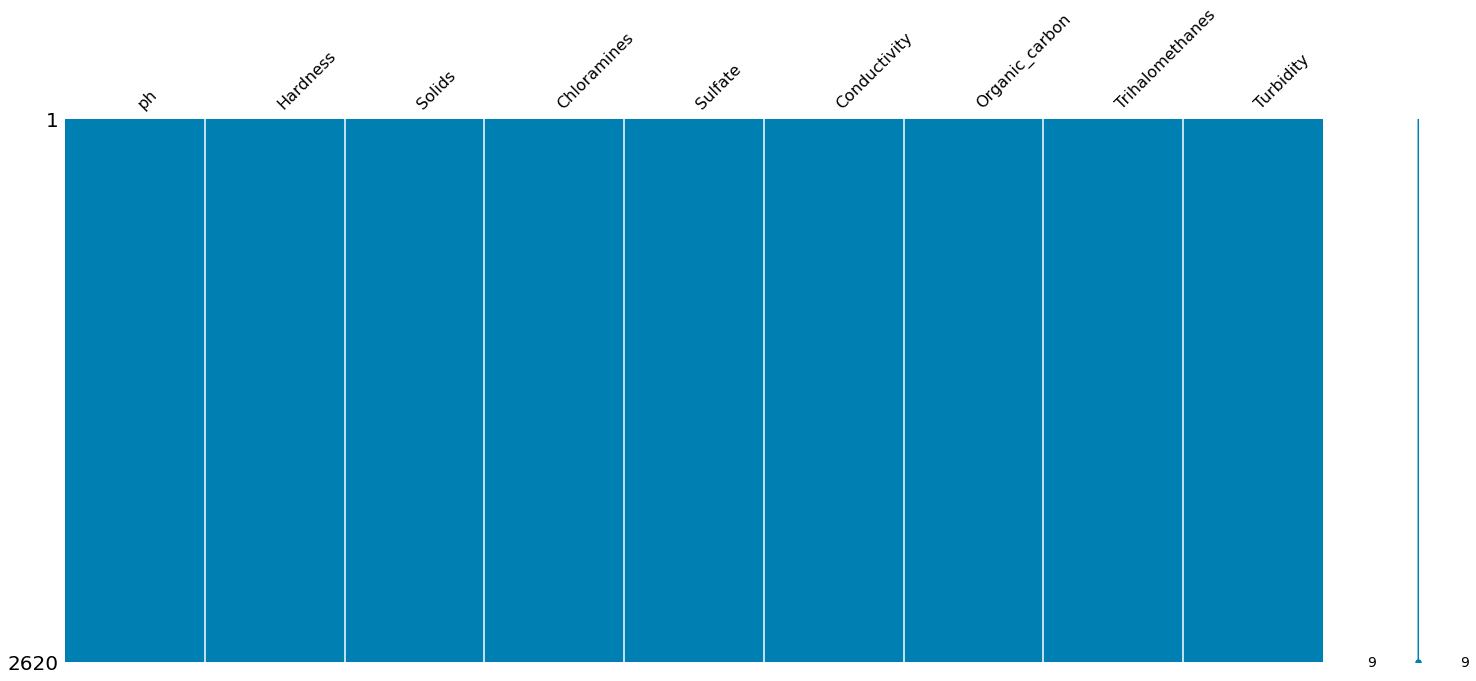

In [26]:
fig = msno.matrix(X_train, color=(0, 0.5, 0.7))

#### NEW FEATURE

In [27]:
def ph_safe(x):

    if (x <= 6.83) & (x >= 6.52):
        x = 1
    else:
        x = 0
    return x


X_train['pH safe'] = X_train['ph'].apply(ph_safe)

In [28]:
X_train['pH safe'].unique()

array([1, 0])

#### ASYMMETRIC

In [29]:
for column in X_train.columns:
    if (column != 'ph') & (column != 'pH safe'):
        boxcox, h = stats.boxcox(df_train[column])
        print('---', column, '---')
        print('shapiro before:', shapiro(X_train[column]).pvalue)
        print('shapiro after:', shapiro(boxcox).pvalue)
        print('asimetria before:', skew(X_train[column]))
        print('asimetria after:', skew(boxcox))

--- Hardness ---
shapiro before: 0.0002814373292494565
shapiro after: 0.00036151957465335727
asimetria before: -0.02198254935365706
asimetria after: 0.024104395899386115
--- Solids ---
shapiro before: 1.9382992502489433e-21
shapiro after: 0.04591383785009384
asimetria before: 0.668327288394969
asimetria after: 0.016092555649375794
--- Chloramines ---
shapiro before: 1.7863561879494227e-05
shapiro after: 2.9320852263481356e-05
asimetria before: -0.014547184436119456
asimetria after: 0.047767611427729485
--- Sulfate ---
shapiro before: 3.6672398591195224e-27
shapiro after: 1.0
asimetria before: -0.09501816651754874
asimetria after: nan
--- Conductivity ---
shapiro before: 2.8942878649296233e-10
shapiro after: 0.0006354068173095584
asimetria before: 0.2796713003365575
asimetria after: -0.008710518974152138
--- Organic_carbon ---
shapiro before: 0.3585250973701477
shapiro after: 0.44988134503364563
asimetria before: 0.03818928103474208
asimetria after: 0.00036981240312813175
--- Trihalomet

In [30]:
for column in X_train:
    if (column != 'ph') & (column != 'pH safe'):
        box, _ = stats.boxcox(X_train[column])
        df_train[column] = box
X_train

ph    Hardness        Solids  Chloramines     Sulfate  \
233   6.623614  203.030141  17167.301297     6.049601  311.726288   
831   6.684700  193.840931  34157.184474     9.876574  344.535407   
2658  6.836060  205.667718  18321.327502     6.712854  297.837188   
2495  7.088976  183.488839  12675.938962     9.777807  319.870584   
2603  6.406798  182.885137  17851.064021     7.462758  332.486731   
...        ...         ...           ...          ...         ...   
1095  4.187491  208.374188  21809.709834     5.846112  327.474203   
1130  7.793915  164.958947  25506.912237     7.868036  358.259200   
1294  6.630364  186.761088  30939.023214     7.703481  333.653302   
860   8.783168  218.032840  16183.586649     7.390474  334.053885   
3174  6.698154  198.286268  34675.862845     6.263602  360.232834   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  pH safe  
233     410.243247       15.914500        65.021229   2.915166        1  
831     498.063996        8.818757        66.659352   4.030660        1  
2658    494.484249       13.808923        70.714225   4.952508        0  
2495    482.445026       13.309723        46.853410   3.240419        0  
2603    398.779746       17.301617        64.070236   4.573968        0  
...            ...             ...              ...        ...      ...  
1095    264.508083       11.235144        46.682597   4.592959        0  
1130    398.460312       15.297496        66.355132   4.220028        0  
1294    330.876083       13.815757        86.753117   3.490588        1  
860     389.021616       16.354520        47.100982   4.274137        0  
3174    430.935009       12.176678        66.355132   3.758180        1  

[2620 rows x 10 columns]

#### OUTLIERS

In [31]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train.size

28820

In [32]:
df_train = df_train[(np.abs(stats.zscore(df_train)) < 3).all(axis=1)]
df_train.size

25498

(-0.49, 1.49, 0.0, 64.54918032786885)

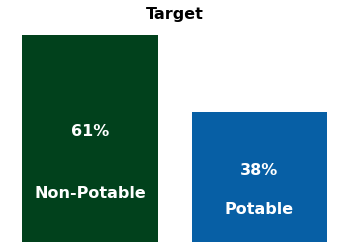

In [33]:
total = df_train['Potability'].count()
potable = df_train['Potability'][df_train['Potability'] ==
                                 1].count() * 100 / total
n_potable = df_train['Potability'][df_train['Potability'] ==
                                   0].count() * 100 / total

target = ['Non-Potable', 'Potable']
ax = plt.bar(['Not potable', 'potable'], [n_potable, potable],
             color=[colors_green[0], colors_blue[0]])
for i, value in enumerate(ax):
    height = value.get_height()
    plt.text(value.get_x() + value.get_width() / 2.,
             0.5 * height,
             '%d' % int(height) + "%",
             ha="center",
             va="bottom",
             color="white",
             fontsize=16,
             fontweight="bold")
    plt.text(value.get_x() + value.get_width() / 2.,
             0.2 * height,
             target[i],
             ha="center",
             va="bottom",
             color="white",
             fontsize=16,
             fontweight="bold")

plt.title("Target", fontsize=16, fontweight="bold")
plt.xlabel("Potability", fontsize=16, fontweight="bold")
plt.ylabel("%", fontsize=16, fontweight="bold")
plt.axis('off')

### SCALER

In [34]:
X_train = df_train.drop(['Potability'], axis=1)
y_train = df_train['Potability']

In [35]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)

In [36]:
X_train = pd.DataFrame(X_train_scaler,
                       index=X_train.index,
                       columns=X_train.columns)

In [37]:
X_train.head(2)

ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
2658 -0.199134  0.288729 -0.409914    -0.264933 -1.081612      0.844297   
2495 -0.020841 -0.413064 -1.076536     1.741916 -0.429474      0.694694   

      Organic_carbon  Trihalomethanes  Turbidity  pH safe  
2658       -0.135922         0.280928   1.288834      0.0  
2495       -0.289528        -1.269050  -0.931595      0.0

## APPLY TRANSFORMATION X TEST

In [38]:
for i in X_test.columns:
    X_test[i] = X_test[i].fillna(mean_feature[i])
    X_test['pH safe'] = X_test['ph'].apply(ph_safe)
    if (column != 'ph') & (column != 'pH safe'):
        box, _ = stats.boxcox(X_test[i])
        X_test[i] = box

In [39]:
X_test_scaler = scaler.transform(X_test)

## Gridsearch

In [40]:
# KNN
grid_neighbors = {
    "n_neighbors": [3, 5, 7, 9, 10, 15, 20],
    "weights": ["uniform", "distance"]
}

#decision tree
grid_arbol = {"max_depth": list(range(1, 10))}

# RANDOM FOREST
grid_random_forest = {
    "n_estimators": [120],
    "max_depth": [3, 4, 5, 6, 10, 15, 17],
    "max_features": ["sqrt", 3, 4]
}

In [41]:
knn = KNeighborsClassifier()
rand_forest = RandomForestClassifier()
clf = DecisionTreeClassifier(random_state=0)

In [42]:
models = [
    ('Random Forest', rand_forest, grid_random_forest),
    ('KNN', knn, grid_neighbors),
    ('Decison Tree', clf, grid_arbol),
]

models_gridsearch = {}

for i in models:
    models_gridsearch[i[0]] = GridSearchCV(i[1],
                                           i[2],
                                           cv=10,
                                           verbose=1,
                                           n_jobs=-1)

    models_gridsearch[i[0]].fit(X_train, y_train)

Fitting 10 folds for each of 21 candidates, totalling 210 fits
Fitting 10 folds for each of 14 candidates, totalling 140 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits


In [43]:
models_gridsearch['Random Forest'].best_estimator_.score(X_test_scaler, y_test)

0.698170731707317